# 1) Loading data and performing preprocessing

In [136]:
# load necessary libraries

import warnings
warnings.simplefilter("ignore")

import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels    
import statsmodels.api as sm
from pandas.tools.plotting import autocorrelation_plot

filename = 'M3C.xls'

In [137]:
#Setting plot attributes

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 10, 7

In [138]:
# ---------------------------------
# Load Dataset
# ---------------------------------
data = pd.read_excel(filename, 
                      header=0, parse_dates=[0],
                      index_col=0, squeeze=True, sheet_name=2)
# print dataset
print()
print(data.shape)
print(data.head(25))


(1428, 149)
         N  NF      Category  Starting Year  Starting Month        1       2  \
Series                                                                         
N1402   68  18  MICRO                  1990               1   2640.0  2640.0   
N1403   68  18  MICRO                  1990               1   1680.0  1920.0   
N1404   68  18  MICRO                  1990               1   1140.0   720.0   
N1405   68  18  MICRO                  1990               1    180.0   940.0   
N1406   68  18  MICRO                  1990               1   2000.0  1550.0   
N1407   68  18  MICRO                  1990               1   1200.0  2850.0   
N1408   68  18  MICRO                  1990               1   1350.0  2400.0   
N1409   68  18  MICRO                  1990               1   2700.0  3600.0   
N1410   68  18  MICRO                  1990               1   3680.0  2600.0   
N1411   68  18  MICRO                  1990               1   4120.0  5020.0   
N1412   68  18  MICRO      

In [139]:
#Remove irrelevant columns and obtain data
full_data = data.dropna()
final_data = full_data.drop(columns=['N', 'NF', 'Category', 'Starting Year', 'Starting Month'])
dataset = final_data.iloc[1]
dataset

1      1955.0
2      2180.0
3      2375.0
4      2315.0
5      2060.0
6      2385.0
7      2110.0
8      2375.0
9      2745.0
10     1845.0
11     2445.0
12     2265.0
13     1975.0
14     1890.0
15     2925.0
16     2475.0
17     2240.0
18     2570.0
19     2270.0
20     3025.0
21     2335.0
22     2730.0
23     3060.0
24     3395.0
25     2745.0
26     2630.0
27     3285.0
28     2260.0
29     2560.0
30     2770.0
        ...  
115    4635.0
116    3660.0
117    4650.0
118    5285.0
119    4240.0
120    3925.0
121    5355.0
122    5970.0
123    6195.0
124    5330.0
125    4940.0
126    5875.0
127    6130.0
128    6340.0
129    6425.0
130    7125.0
131    7695.0
132    6180.0
133    6390.0
134    8015.0
135    9515.0
136    7475.0
137    6845.0
138    7215.0
139    8305.0
140    7160.0
141    8175.0
142    7415.0
143    8260.0
144    7190.0
Name: N1881, Length: 144, dtype: float64

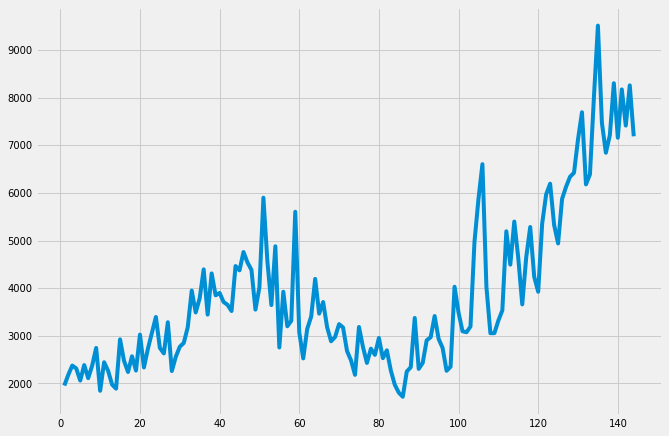

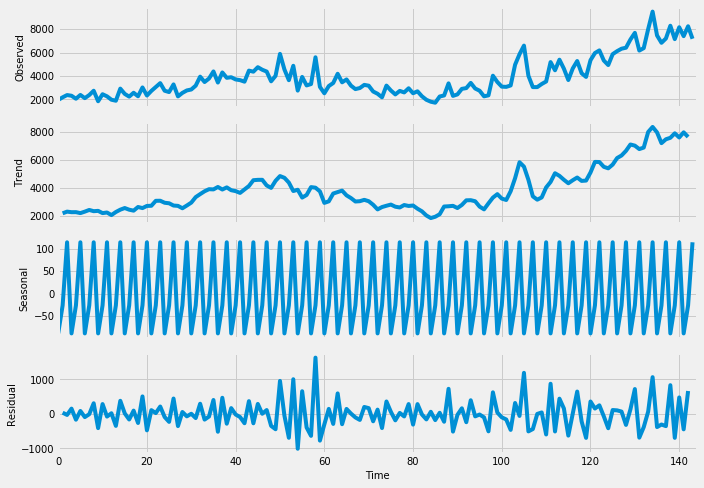

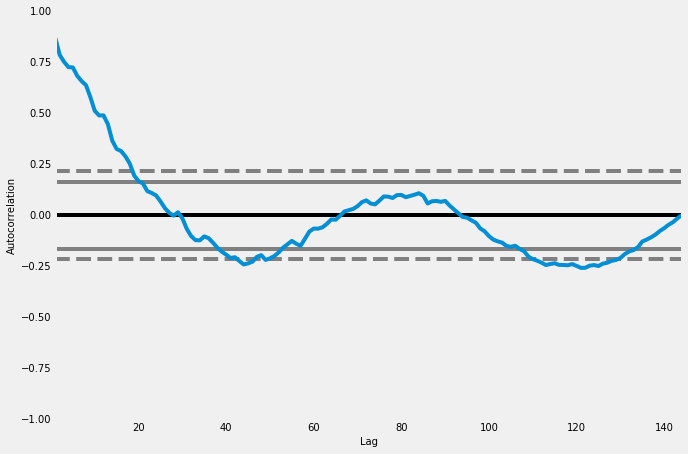

In [140]:
#Plot the dataset
plt.plot(dataset)
plt.show()

print('\n\n\n')

# Decompose diffentent Time Series elements e.g. trand, seasonality, Residual ... ...
decomposition = sm.tsa.seasonal_decompose(np.asarray(dataset), freq=3, model='additive')
decomposition.plot()
plt.show()

print('\n\n\n')

# Auto-correlation plot
autocorrelation_plot(dataset)
plt.show()

In [141]:
# split a multivariate sequence into samples
from numpy import array
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(0, len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
            
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# choose a number of time steps
n_steps = 3
    
# convert into input/output
X, y = split_sequences(np.asarray(dataset), n_steps)
    
print(X.shape)
print(X)
print(y)

(141, 3)
[[1955. 2180. 2375.]
 [2180. 2375. 2315.]
 [2375. 2315. 2060.]
 [2315. 2060. 2385.]
 [2060. 2385. 2110.]
 [2385. 2110. 2375.]
 [2110. 2375. 2745.]
 [2375. 2745. 1845.]
 [2745. 1845. 2445.]
 [1845. 2445. 2265.]
 [2445. 2265. 1975.]
 [2265. 1975. 1890.]
 [1975. 1890. 2925.]
 [1890. 2925. 2475.]
 [2925. 2475. 2240.]
 [2475. 2240. 2570.]
 [2240. 2570. 2270.]
 [2570. 2270. 3025.]
 [2270. 3025. 2335.]
 [3025. 2335. 2730.]
 [2335. 2730. 3060.]
 [2730. 3060. 3395.]
 [3060. 3395. 2745.]
 [3395. 2745. 2630.]
 [2745. 2630. 3285.]
 [2630. 3285. 2260.]
 [3285. 2260. 2560.]
 [2260. 2560. 2770.]
 [2560. 2770. 2850.]
 [2770. 2850. 3180.]
 [2850. 3180. 3950.]
 [3180. 3950. 3490.]
 [3950. 3490. 3790.]
 [3490. 3790. 4395.]
 [3790. 4395. 3445.]
 [4395. 3445. 4310.]
 [3445. 4310. 3850.]
 [4310. 3850. 3900.]
 [3850. 3900. 3710.]
 [3900. 3710. 3650.]
 [3710. 3650. 3520.]
 [3650. 3520. 4465.]
 [3520. 4465. 4375.]
 [4465. 4375. 4760.]
 [4375. 4760. 4540.]
 [4760. 4540. 4385.]
 [4540. 4385. 3550.]
 [43

In [142]:
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[1955. 2180. 2375.] 2315.0
[2180. 2375. 2315.] 2060.0
[2375. 2315. 2060.] 2385.0
[2315. 2060. 2385.] 2110.0
[2060. 2385. 2110.] 2375.0
[2385. 2110. 2375.] 2745.0
[2110. 2375. 2745.] 1845.0
[2375. 2745. 1845.] 2445.0
[2745. 1845. 2445.] 2265.0
[1845. 2445. 2265.] 1975.0
[2445. 2265. 1975.] 1890.0
[2265. 1975. 1890.] 2925.0
[1975. 1890. 2925.] 2475.0
[1890. 2925. 2475.] 2240.0
[2925. 2475. 2240.] 2570.0
[2475. 2240. 2570.] 2270.0
[2240. 2570. 2270.] 3025.0
[2570. 2270. 3025.] 2335.0
[2270. 3025. 2335.] 2730.0
[3025. 2335. 2730.] 3060.0
[2335. 2730. 3060.] 3395.0
[2730. 3060. 3395.] 2745.0
[3060. 3395. 2745.] 2630.0
[3395. 2745. 2630.] 3285.0
[2745. 2630. 3285.] 2260.0
[2630. 3285. 2260.] 2560.0
[3285. 2260. 2560.] 2770.0
[2260. 2560. 2770.] 2850.0
[2560. 2770. 2850.] 3180.0
[2770. 2850. 3180.] 3950.0
[2850. 3180. 3950.] 3490.0
[3180. 3950. 3490.] 3790.0
[3950. 3490. 3790.] 4395.0
[3490. 3790. 4395.] 3445.0
[3790. 4395. 3445.] 4310.0
[4395. 3445. 4310.] 3850.0
[3445. 4310. 3850.] 3900.0
[

# 2) Building a CNN model for prediction

In [143]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# define model - using CNN model
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, activation='relu'))    
model.add(Dense(4, activation='relu'))    
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()
    
# fit model
model.fit(X, y, epochs=1200, verbose = 0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 2, 256)            768       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 1, 256)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 2056      
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 5         
Total params: 2,865
Trainable params: 2,865
Non-trainable params: 0
_________________________________________________________________


In [144]:
#Split data into independent and dependent variables
X, y = split_sequences(dataset, n_steps)    

x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat = model.predict(x_input, verbose=1)
#print(yhat)

df_pred = pd.DataFrame.from_records(yhat, columns = ['predicted'])
df_pred = df_pred.reset_index(drop=True)
    
df_actual = dataset[n_steps:len(dataset)]
df_actual = df_actual.reset_index(drop=True)

141/141 [==============================] - 0s 98us/step


In [145]:
#Get various error measures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

coefficient_of_dermination = r2_score(df_actual, df_pred)
print("R squared: ", coefficient_of_dermination)

mae = mean_absolute_error(df_actual, df_pred)
print('The Mean Absolute Error of our forecasts is {}'.format(round(mae, 2)))

mse = mean_squared_error(df_actual, df_pred)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

msle = mean_squared_log_error(df_actual, df_pred)
print('The Mean Squared Log Error of our forecasts is {}'.format(round(msle, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

R squared:  0.7955742304446533
The Mean Absolute Error of our forecasts is 578.24
The Mean Squared Error of our forecasts is 578548.0
The Mean Squared Log Error of our forecasts is 0.04
The Root Mean Squared Error of our forecasts is 760.62


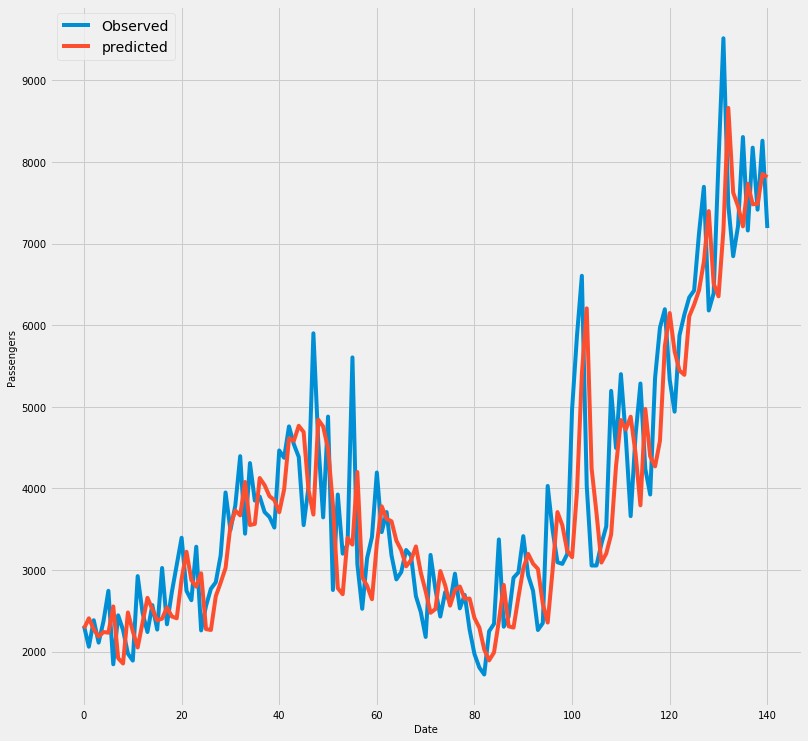

In [146]:
#Plotting
ax = df_actual.plot(label='Observed', figsize=(12, 12))
df_pred.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

1/1 [==============================] - 0s 446us/step


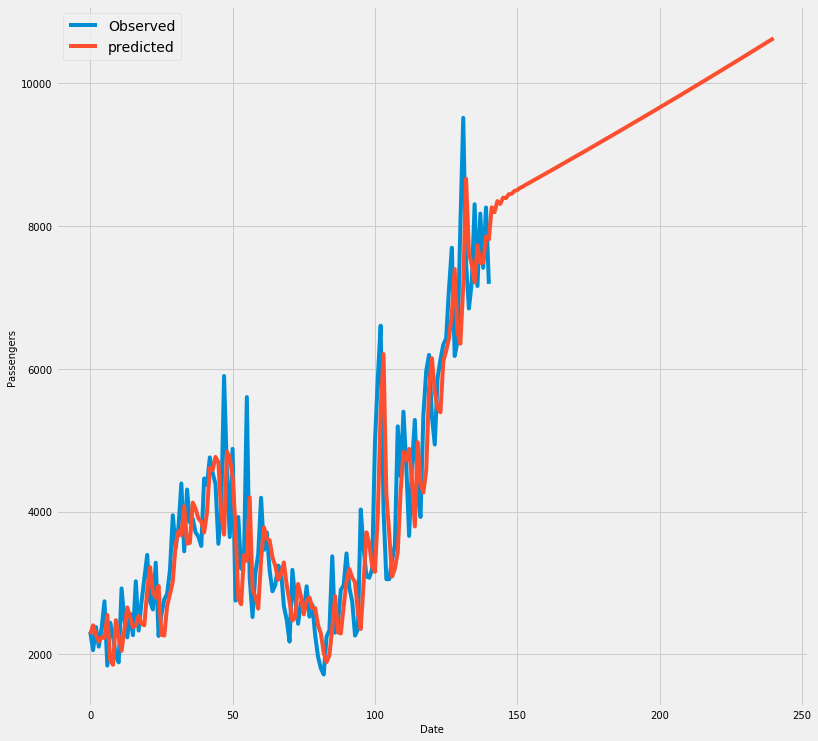

In [147]:
#Future Predictions
predictions = model.predict(x_input, verbose=1)
future_time_steps = 100
x1 = x_input[-1:,:,:]   # take the last input
p1 = predictions[-1:]   # take the last prediction
    
for i in range(future_time_steps):
    x2 = np.array([[x1[0][1], x1[0][2], p1]])
    p2 = model.predict(x2, verbose=1)    
    predictions = np.append(predictions, p2)

    x1 = x2
    p1 = p2

yhat = predictions
yhat = np.reshape(yhat,(-1, 1))

df_pred = pd.DataFrame.from_records(yhat, columns = ['predicted'])
df_pred = df_pred.reset_index(drop=True)
    
df_actual = dataset[n_steps:len(dataset)]
df_actual = df_actual.reset_index(drop=True)    

# plot
ax = df_actual.plot(label='Observed', figsize=(12, 12))
df_pred.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

# 3) Building an LSTM model for prediction

In [148]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
    
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# define model - using LSTM model
model = Sequential()
model.add(LSTM(24, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

# fit model
model.fit(X, y, epochs=5000, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24)                2496      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 25        
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [149]:
#Split data into independent and dependent variables
X, y = split_sequences(dataset, n_steps)    

x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat = model.predict(x_input, verbose=1)
#print(yhat)

df_pred = pd.DataFrame.from_records(yhat, columns = ['predicted'])
df_pred = df_pred.reset_index(drop=True)
    
df_actual = dataset[n_steps:len(dataset)]
df_actual = df_actual.reset_index(drop=True)

141/141 [==============================] - 0s 220us/step


In [150]:
#Calculate errors using different metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

coefficient_of_dermination = r2_score(df_actual, df_pred)
print("R squared: ", coefficient_of_dermination)

mae = mean_absolute_error(df_actual, df_pred)
print('The Mean Absolute Error of our forecasts is {}'.format(round(mae, 2)))

mse = mean_squared_error(df_actual, df_pred)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

msle = mean_squared_log_error(df_actual, df_pred)
print('The Mean Squared Log Error of our forecasts is {}'.format(round(msle, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

R squared:  0.7672627652742142
The Mean Absolute Error of our forecasts is 616.99
The Mean Squared Error of our forecasts is 658672.64
The Mean Squared Log Error of our forecasts is 0.04
The Root Mean Squared Error of our forecasts is 811.59


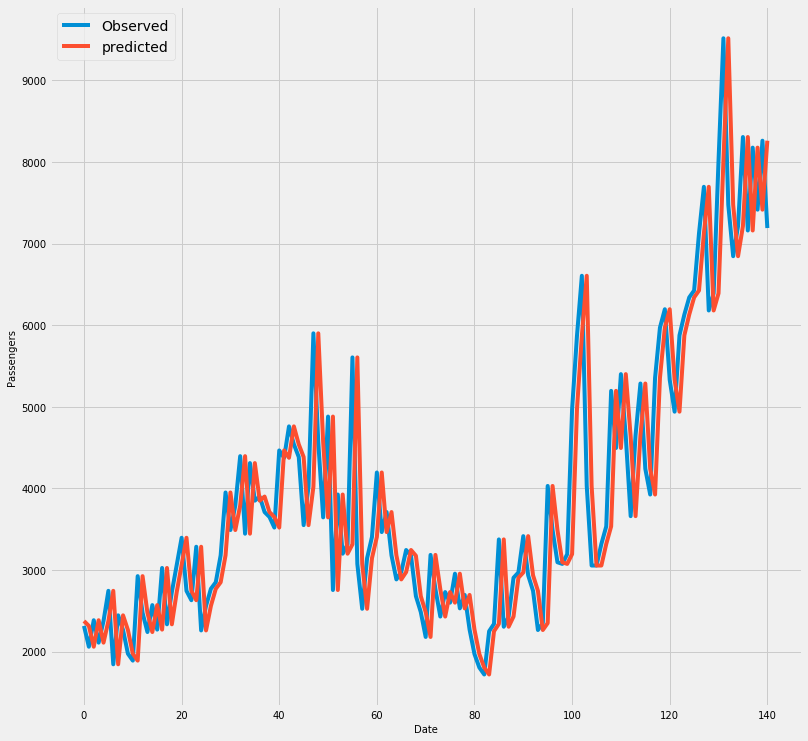

In [151]:
#Plotting
ax = df_actual.plot(label='Observed', figsize=(12, 12))
df_pred.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

1/1 [==============================] - 0s 686us/step


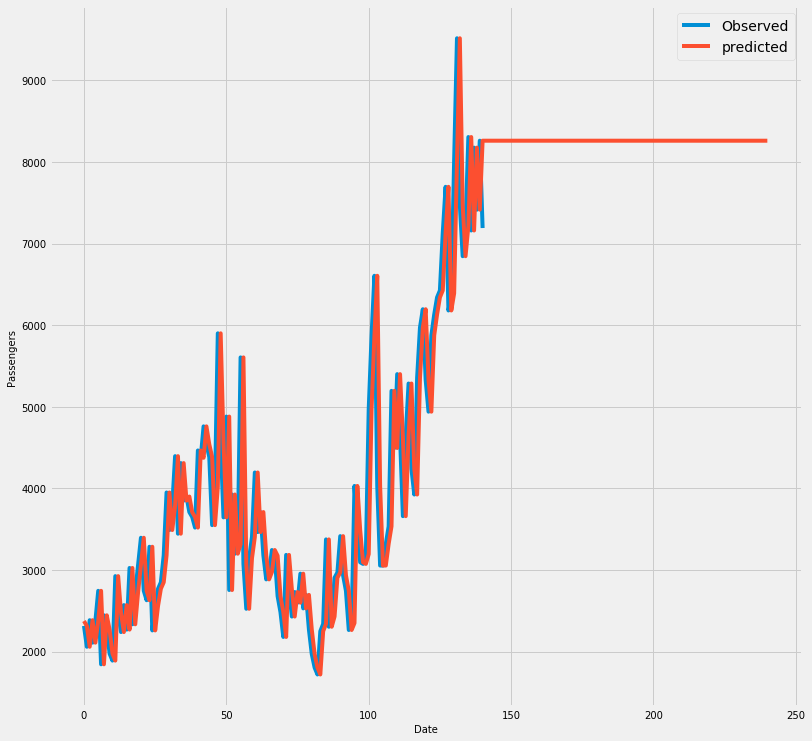

In [152]:
#Future Predictions
predictions = model.predict(x_input, verbose=1)
future_time_steps = 100
x1 = x_input[-1:,:,:]   # take the last input
p1 = predictions[-1:]   # take the last prediction
    
for i in range(future_time_steps):
    x2 = np.array([[x1[0][1], x1[0][2], p1]])
    p2 = model.predict(x2, verbose=1)    
    predictions = np.append(predictions, p2)

    x1 = x2
    p1 = p2

yhat = predictions
yhat = np.reshape(yhat,(-1, 1))

df_pred = pd.DataFrame.from_records(yhat, columns = ['predicted'])
df_pred = df_pred.reset_index(drop=True)
    
df_actual = dataset[n_steps:len(dataset)]
df_actual = df_actual.reset_index(drop=True)    

# plot
ax = df_actual.plot(label='Observed', figsize=(12, 12))
df_pred.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()